# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [432]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt


In [375]:
import numpy as np
from scipy.stats import zscore

df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

In [376]:
# colums to be dropped
drop_cols = ['WaterworksName']

df = df.drop(drop_cols, axis=1)
df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,15.217089,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,28.970630,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,NaN,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,60.686602,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,19.339643,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,25.079249,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


In [377]:
display(df.isna().mean())

drop_cols = []

for i in df.isna().mean().items():
    if(i[1] > 0.5):
        drop_cols.append(i[0])

df = df.drop(drop_cols, axis=1)

TotalFilters                 0.000000
MaxTypicalFlow               0.202532
AverageFilterArea            0.050633
AverageTypicalRunVolume      0.025316
AverageBackwashVolume        0.126582
PrimaryTrigger               0.000000
AverageTotalFilterDepth      0.417722
OverallFilterGrainSizeMin    0.430380
OverallFilterGrainSizeMax    0.430380
AverageFilterBedVolume       0.430380
FilterExploitation           0.202532
AerationType                 0.000000
OxygenFactor                 0.000000
Stage1HLR                    0.265823
TotalEBCT                    0.493671
Footprint                    0.050633
SumOfld_layer                0.493671
UniformityCoefficient        0.645570
UFRV                         0.088608
BW%                          0.164557
HLR_BW                       0.341772
TankCapacity                 0.050633
TankExploitation             0.379747
GravityPressureMixed         0.000000
Stages                       0.000000
AbstractedVolume             0.000000
dtype: float

As we can see there's plenty of NaNs across columns in our dataset, the column that contains the most nans is `UniformlyCoefficient`. It has only 35% of data filled in what means we are very unlikely to successfully fill out that column.

Let's scale our data now

In [378]:
num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

scaler = StandardScaler()



df[num_cols] = scaler.fit_transform(df[num_cols])
df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,...,Footprint,SumOfld_layer,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,-0.062970,-0.615572,-0.658687,0.013068,-0.827796,Time,NaN,NaN,NaN,NaN,...,0.885898,NaN,2.721340,-0.465674,NaN,0.634165,NaN,Gravity,Single,-0.458419
1,-0.560431,-0.396440,-0.784768,-0.540142,-0.321756,Volume,2.694874,-0.637132,-0.709085,-0.258788,...,-0.820640,2.869539,-1.331469,3.667836,-0.095835,-1.107257,NaN,Pressure,Double,-0.263853
2,-0.560431,-0.359918,0.420872,-0.144992,1.232912,Volume,0.676976,1.359683,0.376372,0.933836,...,-0.443564,-0.255289,-0.308485,-0.140352,0.098640,0.248864,NaN,Gravity,Double,-0.225746
3,-1.057891,NaN,0.496675,-0.438532,-0.377982,Volume,NaN,NaN,NaN,NaN,...,1.576548,NaN,-1.163373,-0.144961,NaN,-0.404295,NaN,Gravity,Single,-0.510808
4,-1.057891,NaN,-1.179178,-0.545787,-0.982419,Volume,NaN,0.694078,0.267827,NaN,...,4.510634,NaN,-0.710829,-0.208783,NaN,2.390177,NaN,Gravity,Single,-0.592361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2.424334,4.409852,4.186904,NaN,1.983538,Mix,-0.130183,-0.637132,4.537294,3.684053,...,-0.721016,-1.234335,NaN,-0.508881,NaN,-0.642227,0.820457,Gravity,Double,5.619877
75,3.419256,4.341519,-0.175889,-0.065962,0.493531,Volume,0.676976,-0.637132,-0.600540,0.098695,...,-0.748722,1.135345,0.637975,-0.315181,1.691207,-0.863197,NaN,Pressure,Single,5.384925
76,-0.062970,0.114868,0.352544,-0.310785,0.340876,Time,0.340660,0.361276,-0.745267,0.596399,...,1.771806,-0.132419,-0.755890,0.272164,-0.112376,0.287043,1.150600,Gravity,Single,-0.366267
77,1.429413,NaN,2.973473,-0.077252,2.658258,Volume,NaN,NaN,NaN,NaN,...,1.009519,NaN,-1.072645,5.934660,0.034370,NaN,NaN,Gravity,Double,0.229847


In [379]:
# Calculate z-scores for each numeric column, omit nans
z_scores = df.select_dtypes(include=['number']).apply(lambda col: zscore(col, nan_policy='omit'))

# Mean of zscores for each column
z_scores = z_scores.apply(abs)
z_scores.mean()


TotalFilters                 0.775564
MaxTypicalFlow               0.654330
AverageFilterArea            0.743709
AverageTypicalRunVolume      0.456845
AverageBackwashVolume        0.749690
AverageTotalFilterDepth      0.775509
OverallFilterGrainSizeMin    0.727892
OverallFilterGrainSizeMax    0.757794
AverageFilterBedVolume       0.753508
FilterExploitation           0.814330
OxygenFactor                 0.782223
Stage1HLR                    0.781841
TotalEBCT                    0.683121
Footprint                    0.635267
SumOfld_layer                0.721191
UFRV                         0.775179
BW%                          0.481597
HLR_BW                       0.677310
TankCapacity                 0.685766
TankExploitation             0.783001
AbstractedVolume             0.526304
dtype: float64

We can see that for some columns average zscore is very high, for example `FilterExploitation`. In cases where average zscore is high it is better to fill nan values with median instead of average. In this scenario I will go with 0.7 as the threshold for imputing nans with median.

Let's impute them now.

In [380]:
# accumulator for column names to be filled with median
fill_median = []
# accumulator for column names to be filled with mean
fill_mean = []

for i in z_scores.columns:
    if(z_scores[i][1] > 0.7):
        fill_median.append(i)
    else:
        fill_mean.append(i)

Now that we have columns to be filled with mean and columns to be filled with median we can proceed to actually imputing NaNs

In [381]:

for col in fill_median:
    df[col] = df[col].fillna(df[col].median().__round__(2))

for col in fill_mean:
    df[col] = df[col].fillna(df[col].mean().__round__(2))

Now that our numerical colums don't have any NaNs we can take a look at categorical columns

In [382]:
df.isna().sum()

TotalFilters                 0
MaxTypicalFlow               0
AverageFilterArea            0
AverageTypicalRunVolume      0
AverageBackwashVolume        0
PrimaryTrigger               0
AverageTotalFilterDepth      0
OverallFilterGrainSizeMin    0
OverallFilterGrainSizeMax    0
AverageFilterBedVolume       0
FilterExploitation           0
AerationType                 0
OxygenFactor                 0
Stage1HLR                    0
TotalEBCT                    0
Footprint                    0
SumOfld_layer                0
UFRV                         0
BW%                          0
HLR_BW                       0
TankCapacity                 0
TankExploitation             0
GravityPressureMixed         0
Stages                       0
AbstractedVolume             0
dtype: int64

No NaNs left! Let's work on categorical features now, 

In [383]:
cat_cols = df.select_dtypes(include=object)
cat_cols

,PrimaryTrigger,AerationType,GravityPressureMixed,Stages
0,Time,Cascade,Gravity,Single
1,Volume,Air injection,Pressure,Double
2,Volume,Bottom aeration,Gravity,Double
3,Volume,Cascade,Gravity,Single
4,Volume,Cascade,Gravity,Single
...,...,...,...,...
74,Mix,Cascade,Gravity,Double
75,Volume,Passive plate aerator,Pressure,Single
76,Time,Bottom aeration,Gravity,Single
77,Volume,Cascade,Gravity,Double


As you can see there are very few columns with string. Most of them can be simply One-Hot-Encoded but `Stages` can easily be mapped to numbers.

In [384]:
display(df)
one_hot = ['PrimaryTrigger', 'AerationType', 'GravityPressureMixed']

df = pd.get_dummies(df, columns=['PrimaryTrigger', 'AerationType', 'GravityPressureMixed'], dtype=float)

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,...,Footprint,SumOfld_layer,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,-0.062970,-0.615572,-0.658687,0.013068,-0.827796,Time,-0.180000,0.000000,-0.560000,-0.000000,...,0.885898,-0.130000,2.721340,-0.465674,-0.000000,0.634165,-0.000000,Gravity,Single,-0.458419
1,-0.560431,-0.396440,-0.784768,-0.540142,-0.321756,Volume,2.694874,-0.637132,-0.709085,-0.258788,...,-0.820640,2.869539,-1.331469,3.667836,-0.095835,-1.107257,-0.000000,Pressure,Double,-0.263853
2,-0.560431,-0.359918,0.420872,-0.144992,1.232912,Volume,0.676976,1.359683,0.376372,0.933836,...,-0.443564,-0.255289,-0.308485,-0.140352,0.098640,0.248864,-0.000000,Gravity,Double,-0.225746
3,-1.057891,-0.000000,0.496675,-0.438532,-0.377982,Volume,-0.180000,0.000000,-0.560000,-0.000000,...,1.576548,-0.130000,-1.163373,-0.144961,-0.000000,-0.404295,-0.000000,Gravity,Single,-0.510808
4,-1.057891,-0.000000,-1.179178,-0.545787,-0.982419,Volume,-0.180000,0.694078,0.267827,-0.000000,...,4.510634,-0.130000,-0.710829,-0.208783,-0.000000,2.390177,-0.000000,Gravity,Single,-0.592361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2.424334,4.409852,4.186904,0.000000,1.983538,Mix,-0.130183,-0.637132,4.537294,3.684053,...,-0.721016,-1.234335,-0.260000,-0.508881,-0.000000,-0.642227,0.820457,Gravity,Double,5.619877
75,3.419256,4.341519,-0.175889,-0.065962,0.493531,Volume,0.676976,-0.637132,-0.600540,0.098695,...,-0.748722,1.135345,0.637975,-0.315181,1.691207,-0.863197,-0.000000,Pressure,Single,5.384925
76,-0.062970,0.114868,0.352544,-0.310785,0.340876,Time,0.340660,0.361276,-0.745267,0.596399,...,1.771806,-0.132419,-0.755890,0.272164,-0.112376,0.287043,1.150600,Gravity,Single,-0.366267
77,1.429413,-0.000000,2.973473,-0.077252,2.658258,Volume,-0.180000,0.000000,-0.560000,-0.000000,...,1.009519,-0.130000,-1.072645,5.934660,0.034370,-0.230000,-0.000000,Gravity,Double,0.229847


Now we are left with one not encoded column - `Stages`. Let's Label-Encode that one:

In [385]:
df['Stages'].value_counts()

Stages
Single    40
Double    37
Mixed      1
Triple     1
Name: count, dtype: int64

We can see that there's only one occurance of `Mixed` value for that column, let's remove cause its disturbing for our data.

In [386]:
mixed_rows = df[df['Stages'] == 'Mixed']

df = df.drop(mixed_rows.index[0], axis='index')

Now we can label encode it, I'll do that manually since I want the number to coresspond to actual value.

In [387]:
encoding_map = {
    'Single': 1,
    'Double': 2,
    'Triple': 3
}

for index, row in df.iterrows():
    df.at[index, 'Stages'] = encoding_map[row['Stages']]

Let's take a look at outliers now:

In [405]:

# plt.figure(figsize=(12, 6))
# for col in df.columns:
#     sns.boxplot(x=df[col], legend=True)
#     plt.show()

After inspecting outliers I have decided not to remove any outliers due to lack on domain knowledge on my side.

In [423]:
corr = df.corr()
# display(corr)

acc = []
for i, row in corr.iterrows():
    for col in corr.columns:
        if(corr[col][i] > 0.7 and col != i):
            acc.append((col, i))

acc

[('AbstractedVolume', 'MaxTypicalFlow'),
 ('AverageBackwashVolume', 'AverageFilterArea'),
 ('AverageFilterArea', 'AverageBackwashVolume'),
 ('SumOfld_layer', 'AverageTotalFilterDepth'),
 ('AverageTotalFilterDepth', 'SumOfld_layer'),
 ('MaxTypicalFlow', 'AbstractedVolume')]

We can see that there is high correlation between features: AbstractedVolume-MaxTypicalFlow, AverageBackwashVolume-AverageFilterArea and SumOfId_layer-AverageTotalFilterDepth.

Let's remove one feature for each of the correlations:

In [424]:
df = df.drop(columns=['MaxTypicalFlow', 'AverageBackwashVolume', 'SumOfld_layer'])

,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,FilterExploitation,OxygenFactor,Stage1HLR,...,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Gravity,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,-0.062970,-0.658687,0.013068,-0.180000,0.000000,-0.560000,-0.000000,-0.105711,-0.095208,-0.910784,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.560431,-0.784768,-0.540142,2.694874,-0.637132,-0.709085,-0.258788,0.134672,-1.127717,1.429302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.560431,0.420872,-0.144992,0.676976,1.359683,0.376372,0.933836,0.193835,1.228522,-0.303775,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.057891,0.496675,-0.438532,-0.180000,0.000000,-0.560000,-0.000000,0.000000,0.672555,-0.350000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.057891,-1.179178,-0.545787,-0.180000,0.694078,0.267827,-0.000000,0.000000,-2.345548,-0.350000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2.424334,4.186904,0.000000,-0.130183,-0.637132,4.537294,3.684053,1.336665,-1.418938,0.007969,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75,3.419256,-0.175889,-0.065962,0.676976,-0.637132,-0.600540,0.098695,1.238848,0.910826,0.406159,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
76,-0.062970,0.352544,-0.310785,0.340660,0.361276,-0.745267,0.596399,-1.750409,-0.915920,-0.568556,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77,1.429413,2.973473,-0.077252,-0.180000,0.000000,-0.560000,-0.000000,0.000000,1.175572,-0.350000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now let's take a look at skewnes of our data:

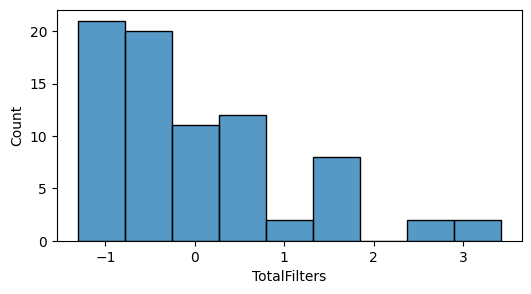

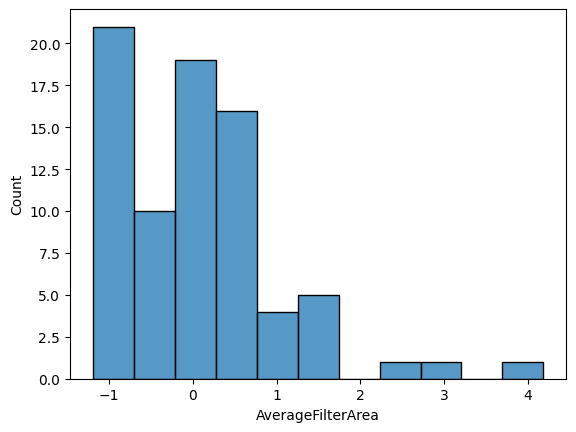

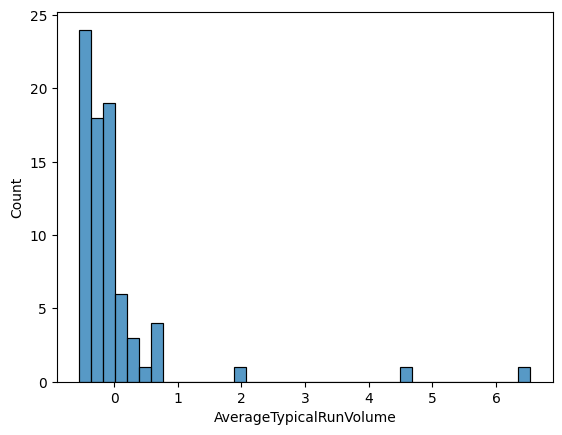

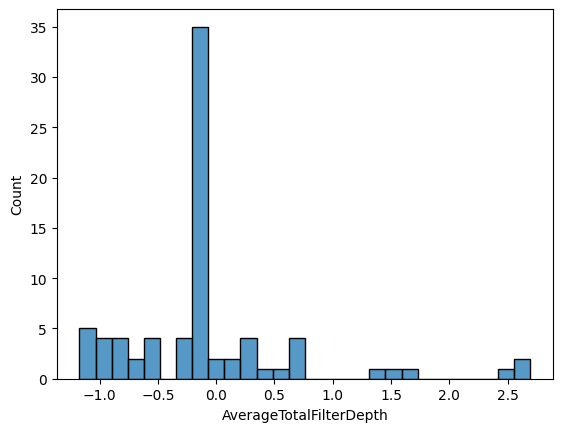

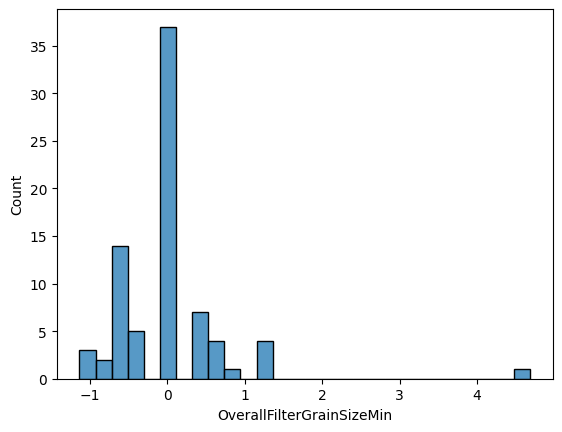

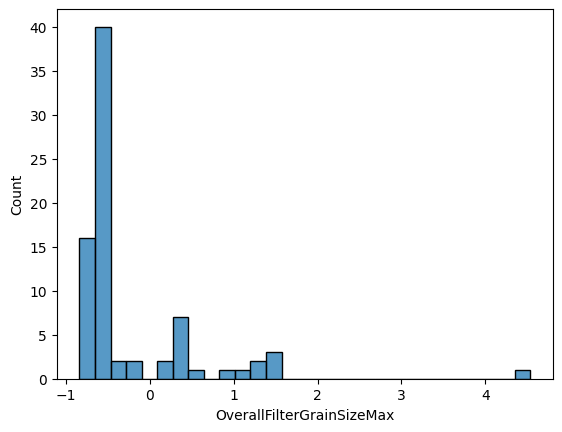

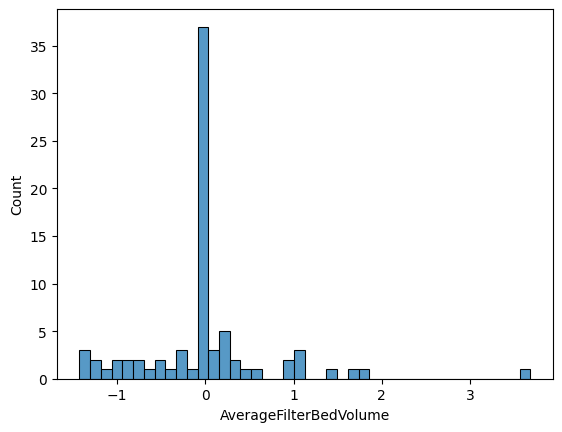

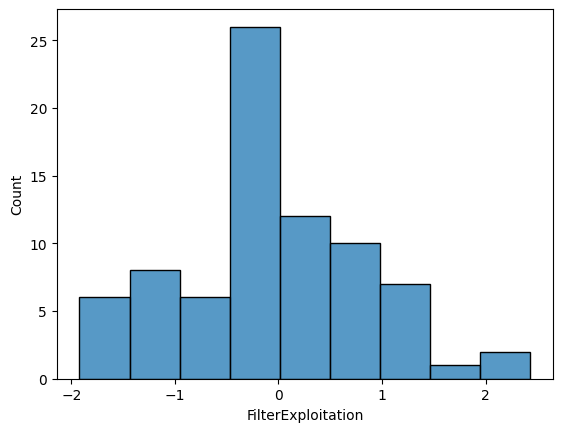

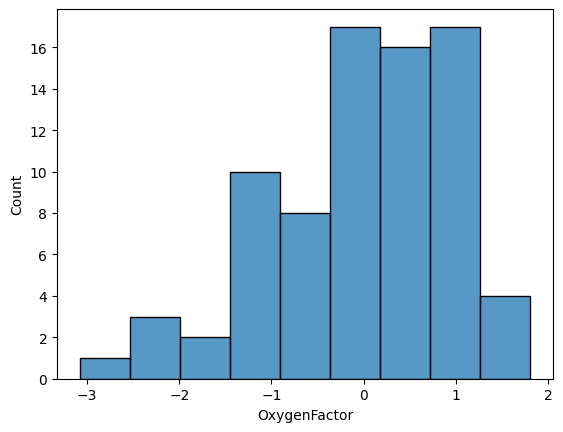

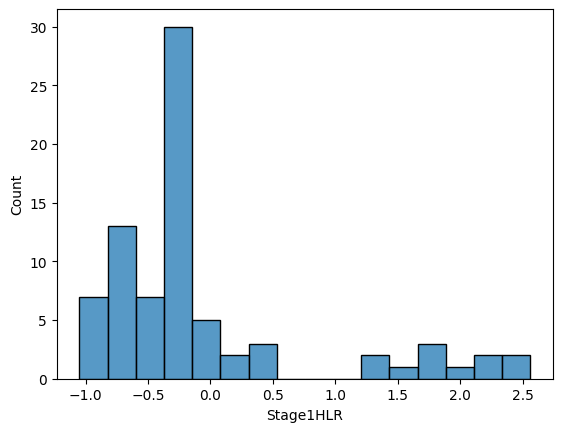

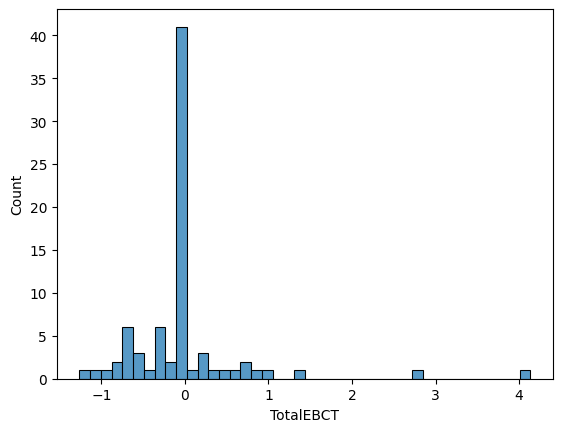

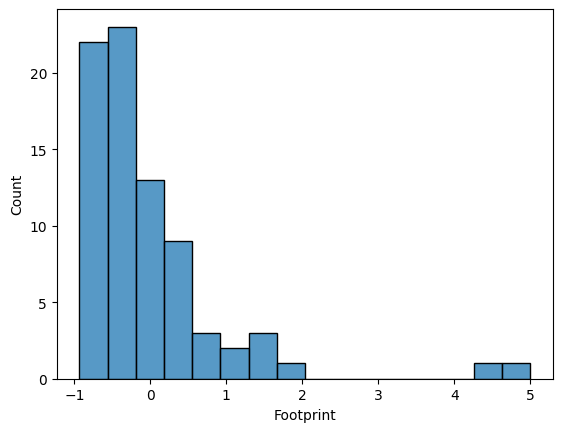

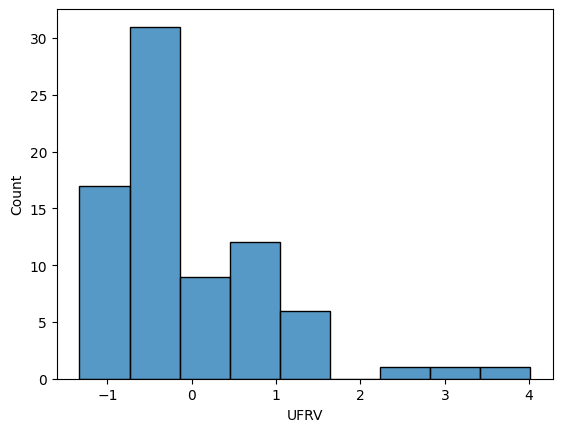

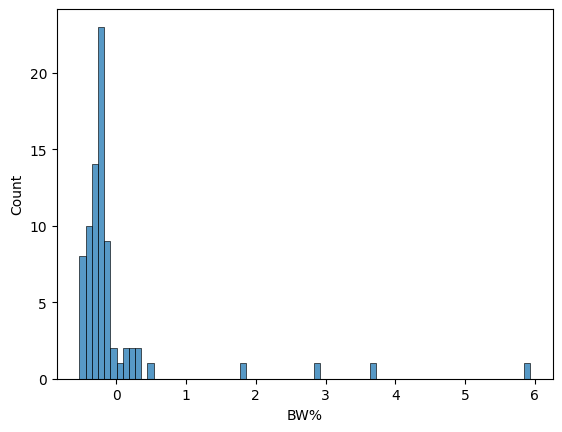

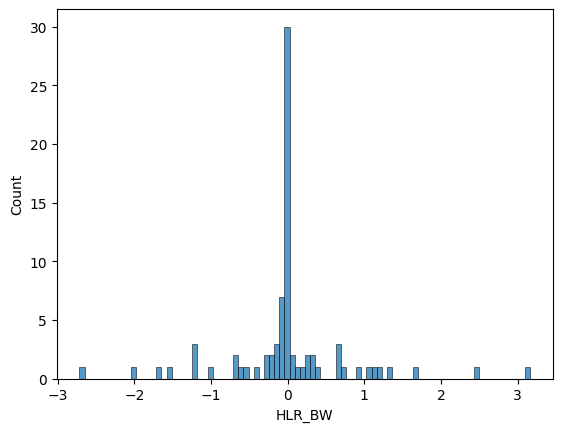

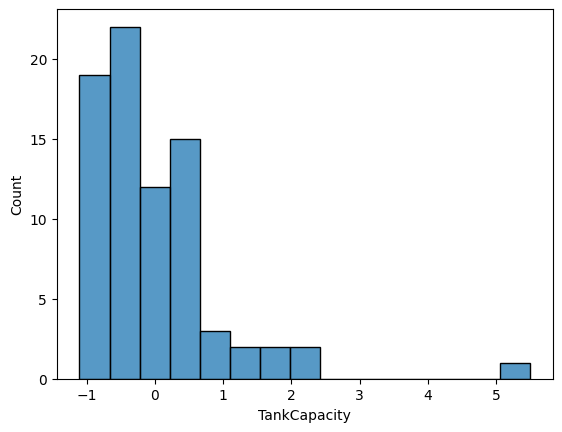

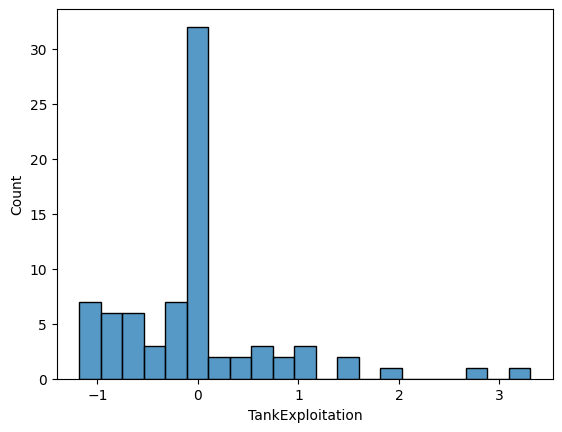

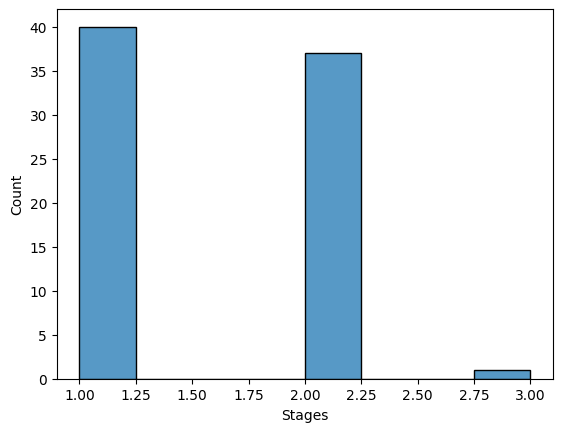

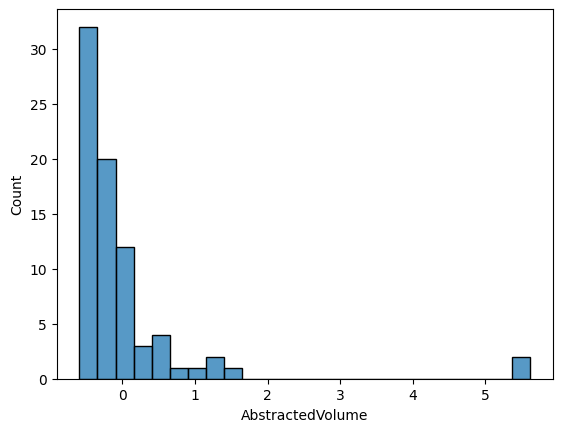

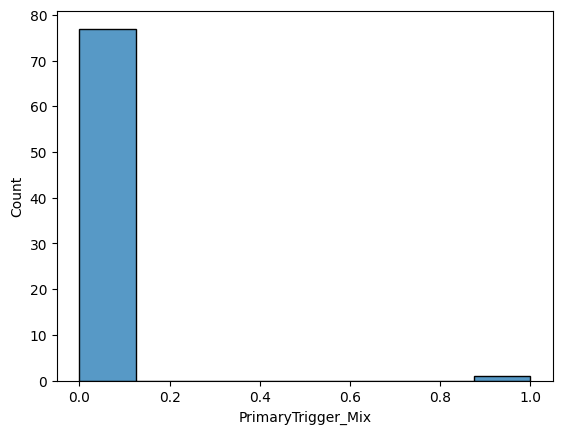

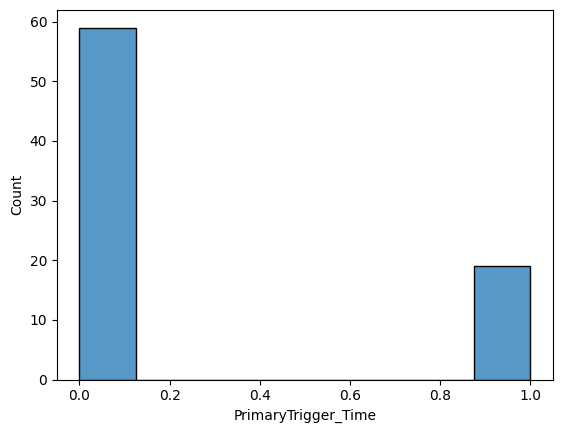

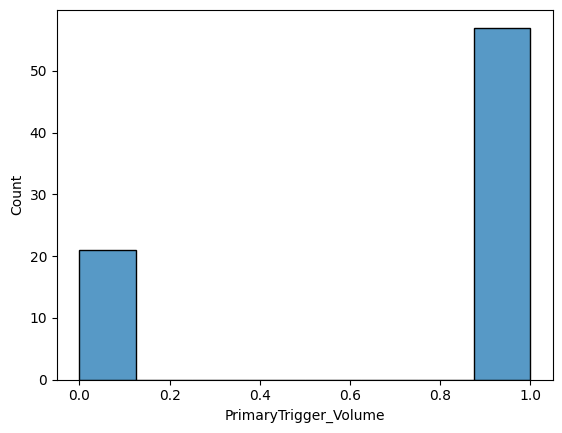

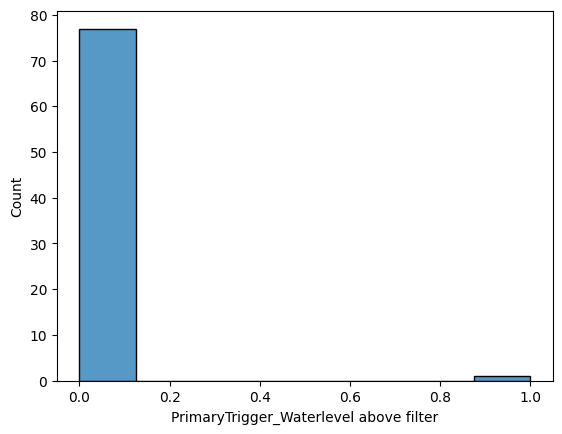

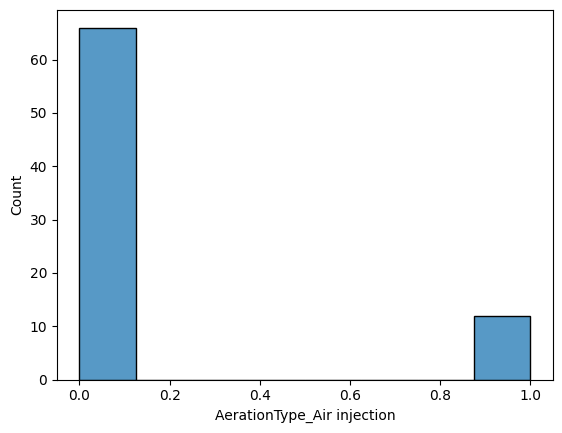

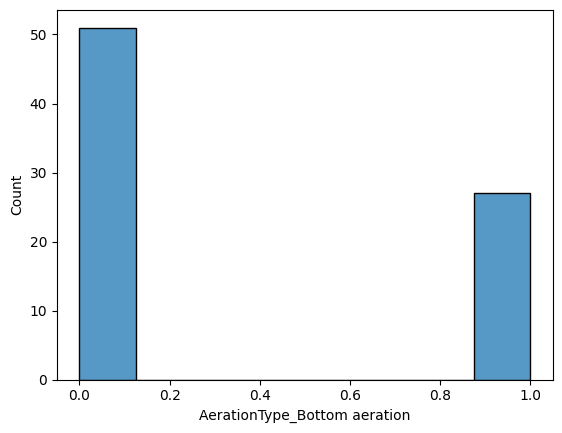

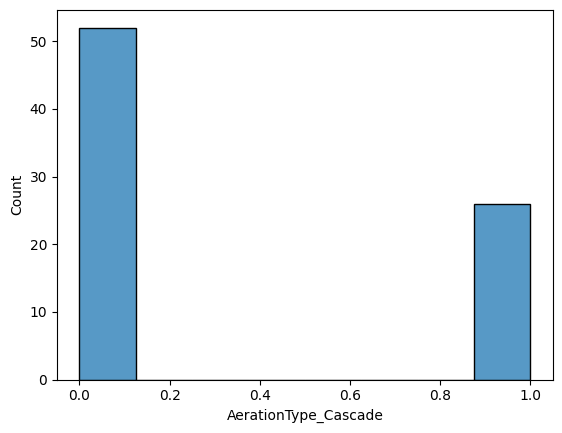

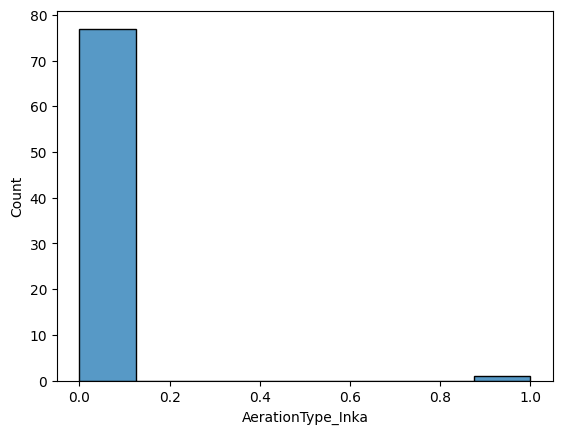

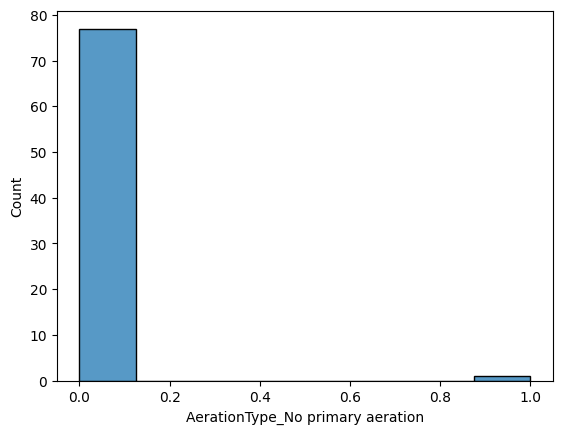

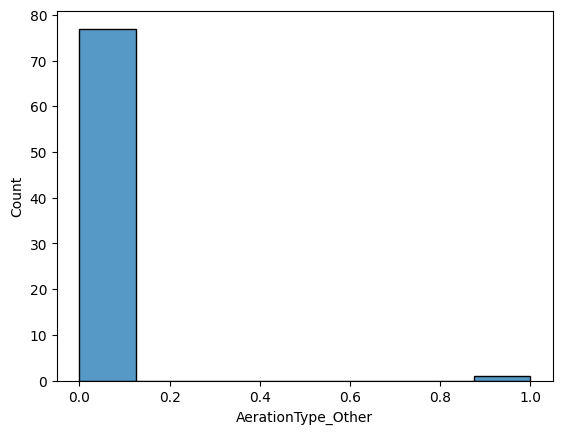

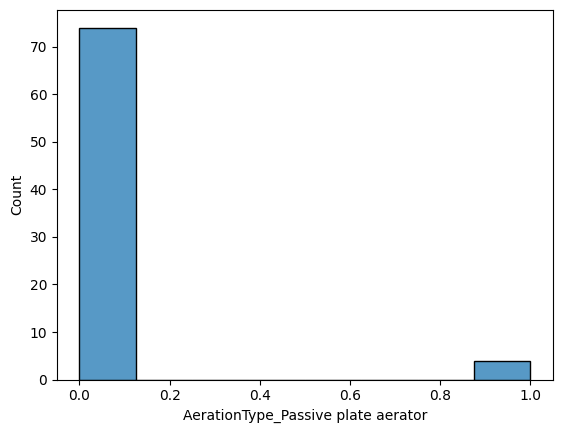

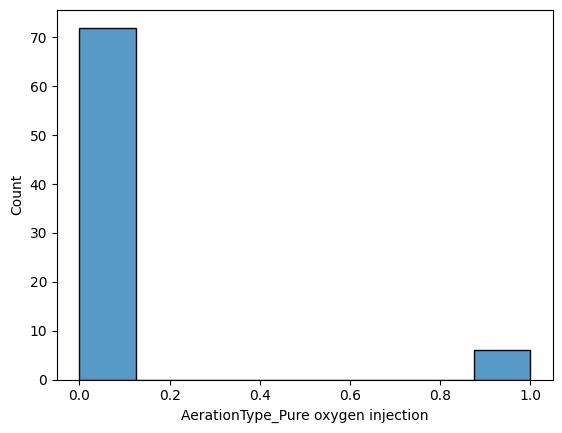

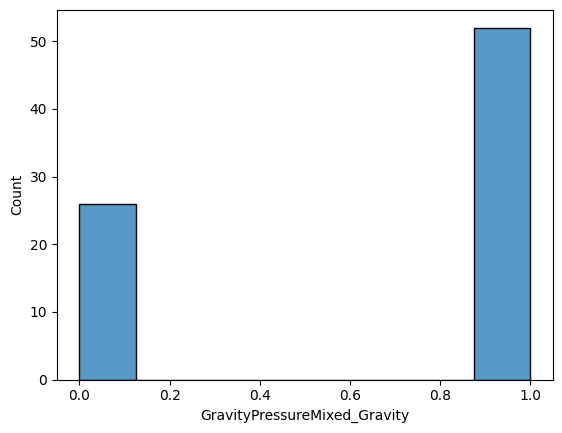

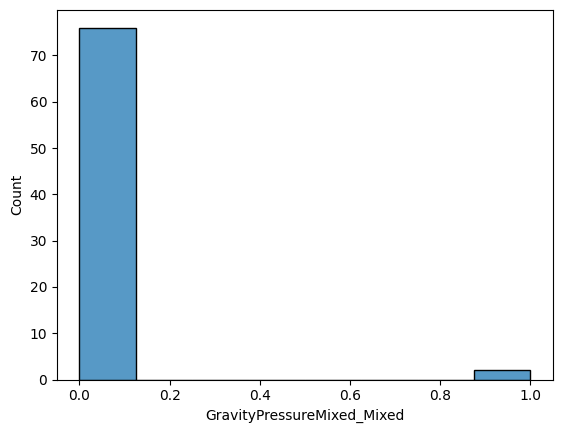

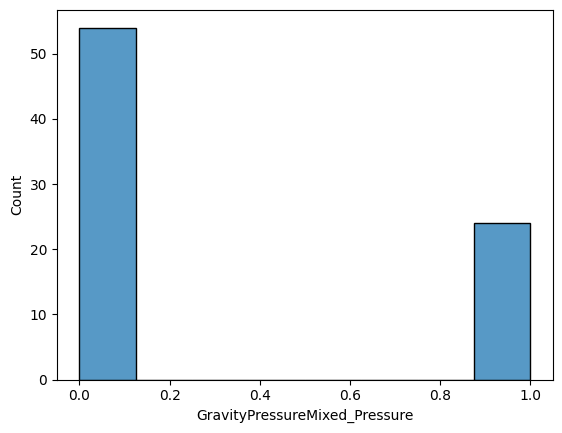

In [429]:
plt.figure(figsize=(6, 3))
for col in df.columns:
    sns.histplot(x=df[col], legend=True)
    plt.show()

From histograms above we can see that certain columns are right-skewed, let's fix that:

/opt/homebrew/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


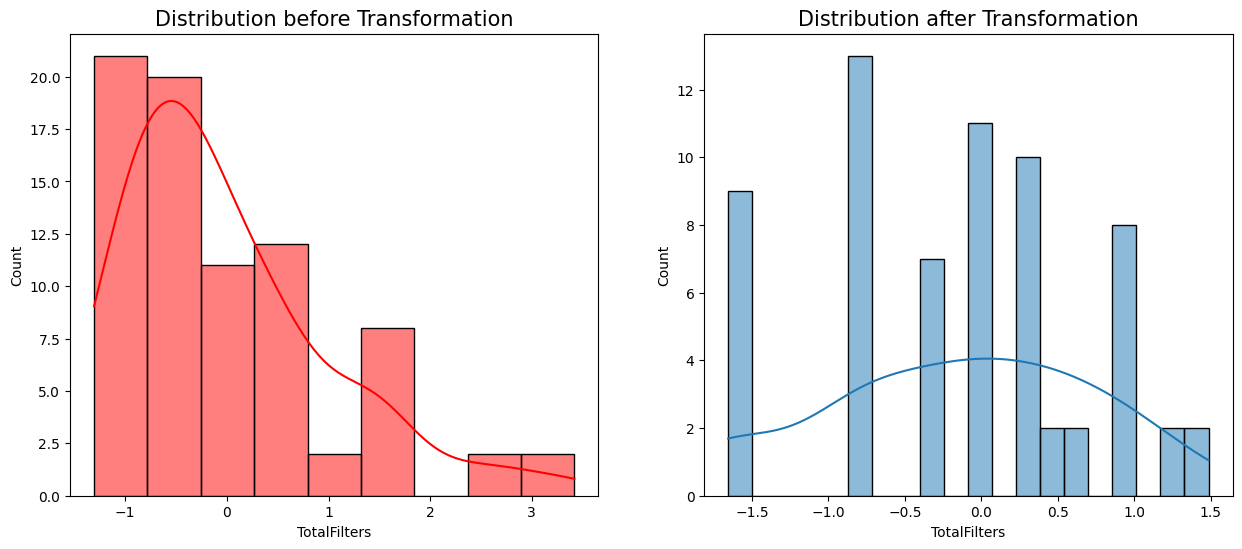

Pre-transform skewness: 1.266181004469609
Post-transform skewness: -0.19675561165541205


/opt/homebrew/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


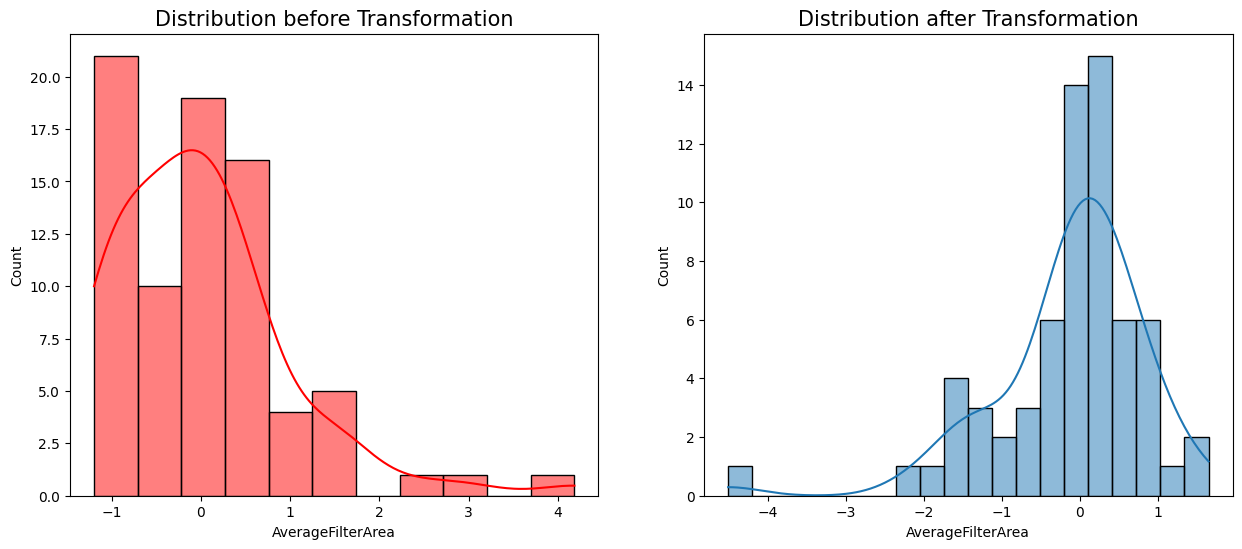

Pre-transform skewness: 1.558987614407343
Post-transform skewness: -1.6701923451423528


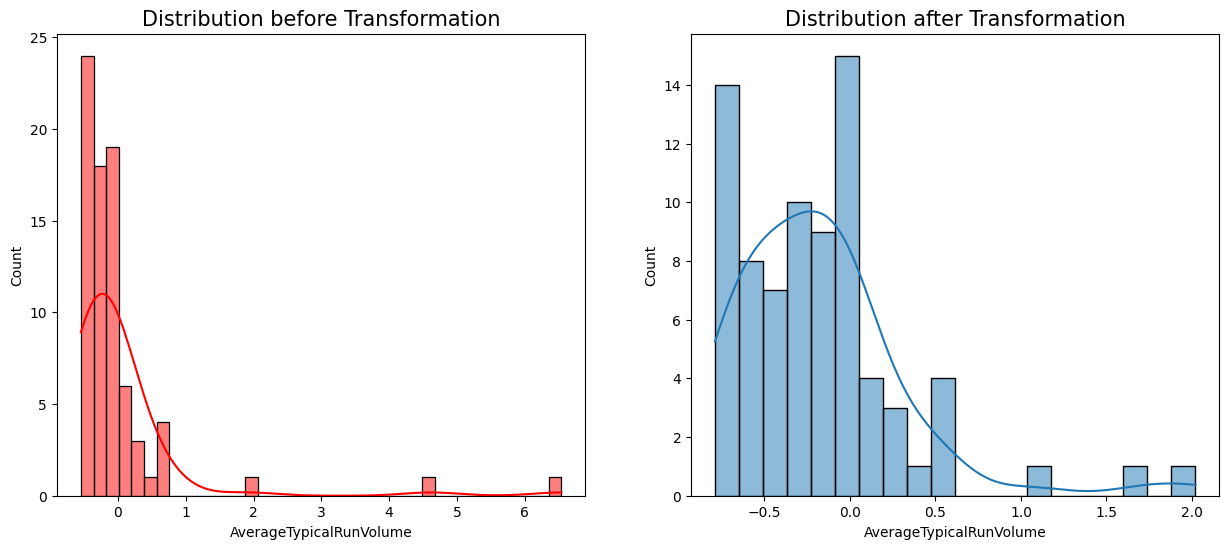

Pre-transform skewness: 5.107322389229255
Post-transform skewness: 1.970191990866243


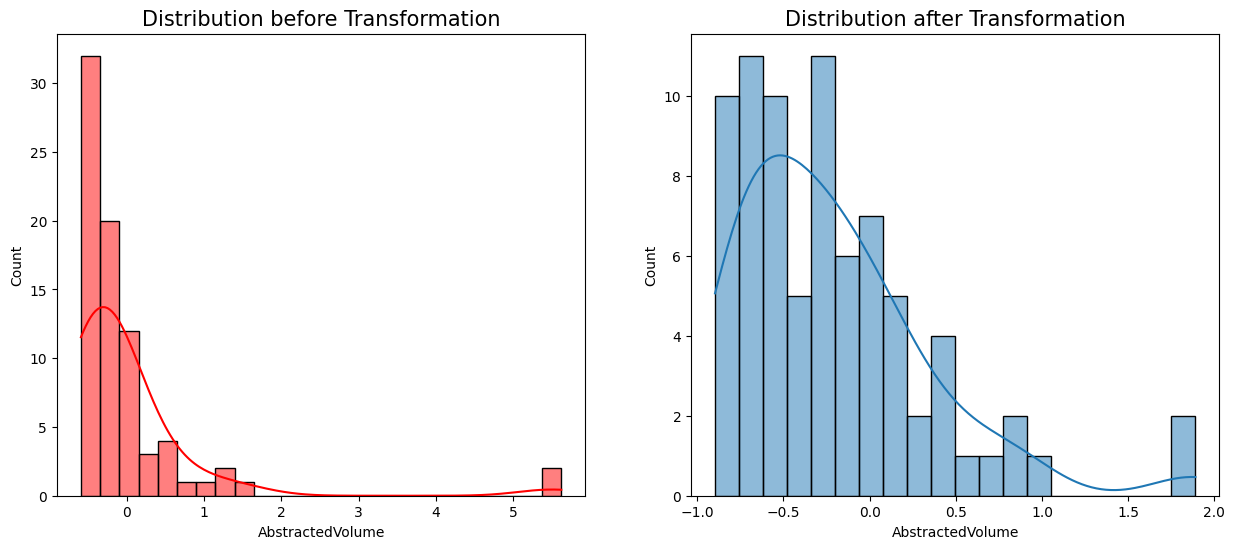

Pre-transform skewness: 4.364653174278574
Post-transform skewness: 1.5563262750039404


/opt/homebrew/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


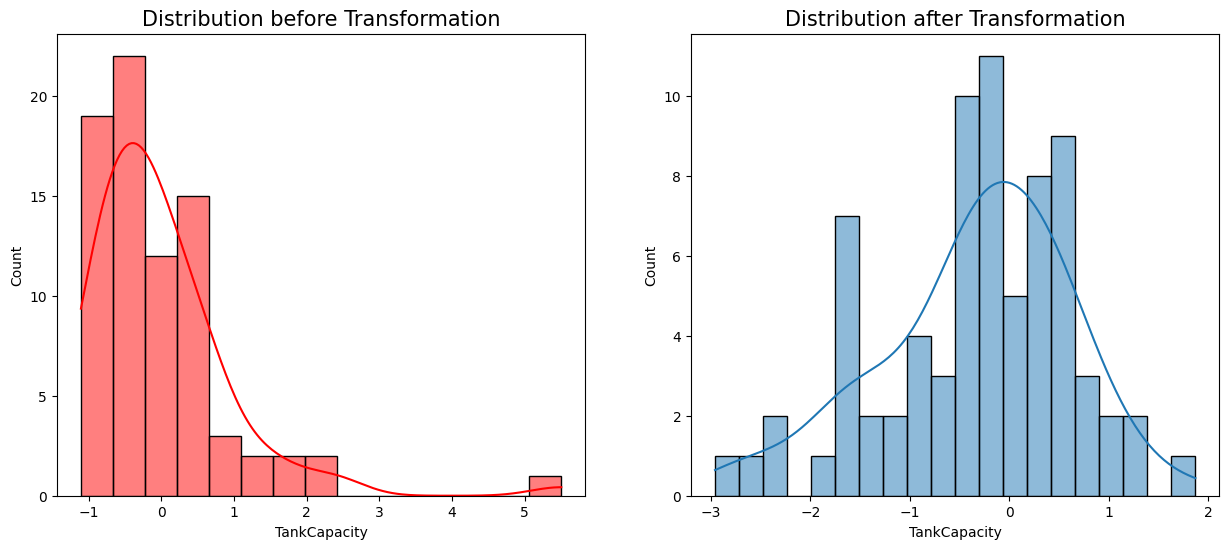

Pre-transform skewness: 2.732383329172034
Post-transform skewness: -0.5834418433731736


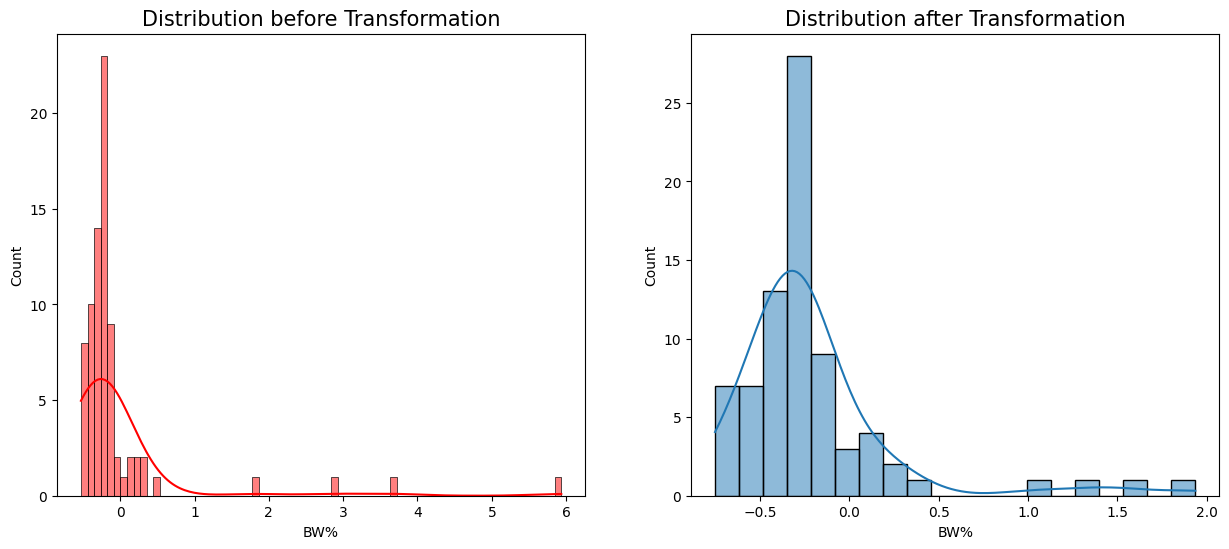

Pre-transform skewness: 4.848651408104812
Post-transform skewness: 2.8255167569895088


/opt/homebrew/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


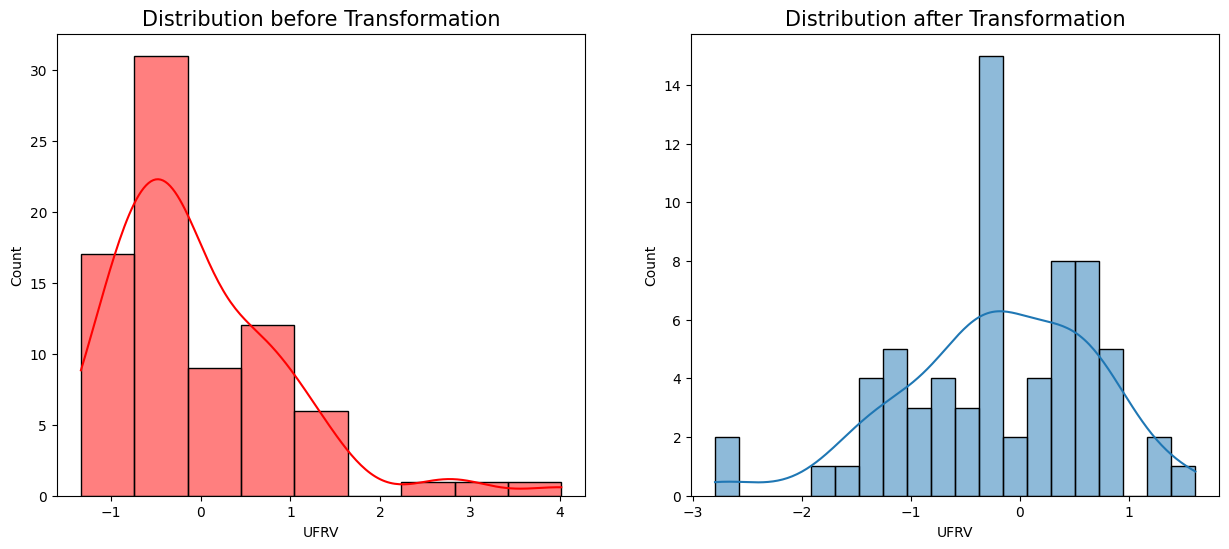

Pre-transform skewness: 1.599678769493746
Post-transform skewness: -0.5825461977320447


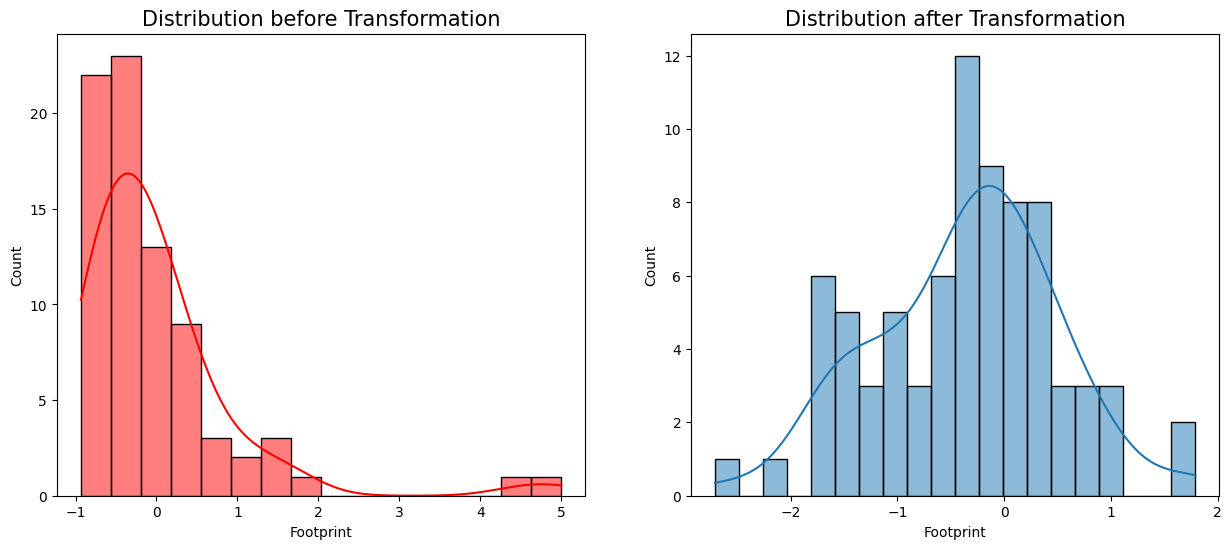

Pre-transform skewness: 3.139446872437632
Post-transform skewness: -0.15803706190109953


In [440]:
right_skewed_cols = ['TotalFilters', 'AverageFilterArea', 'AverageTypicalRunVolume', 'AbstractedVolume', 'TankCapacity', 'BW%', 'UFRV', 'Footprint']

# source: https://www.kaggle.com/code/aimack/how-to-handle-skewed-distribution
def log_transform(feature):

    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

    print(f'Pre-transform skewness: {df[feature].skew()}')
    print(f'Post-transform skewness: {df_log.skew()[0]}')

    df[feature] = df_log

for feat in right_skewed_cols:
    log_transform(feat)



We got decent results with most of the features, but a few of them are still applicable to be log transformed

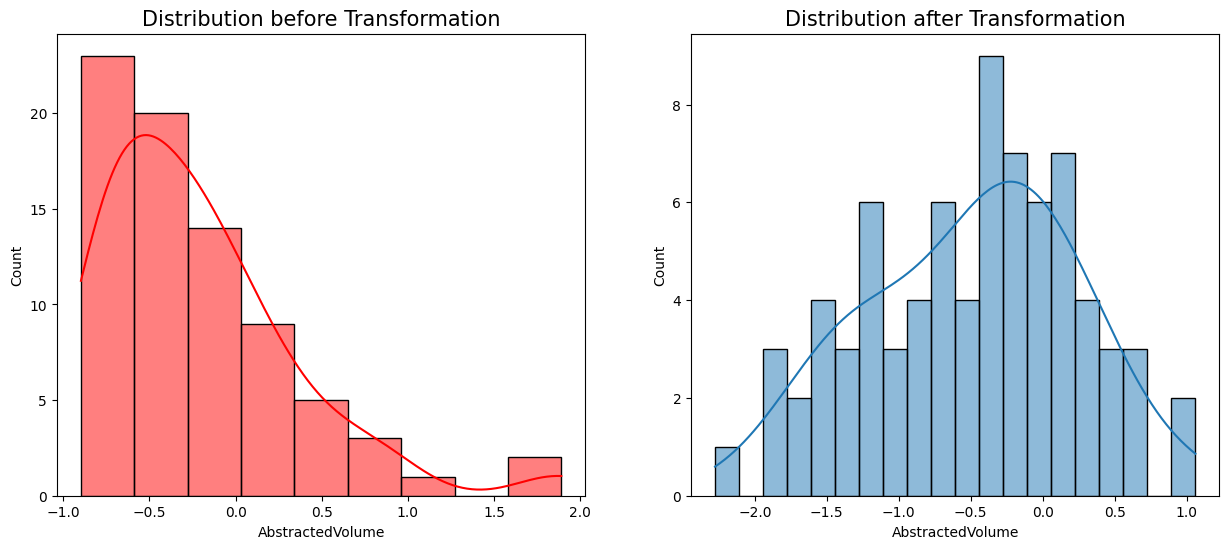

Pre-transform skewness: 1.5727719200759136
Post-transform skewness: -0.2003782896843449


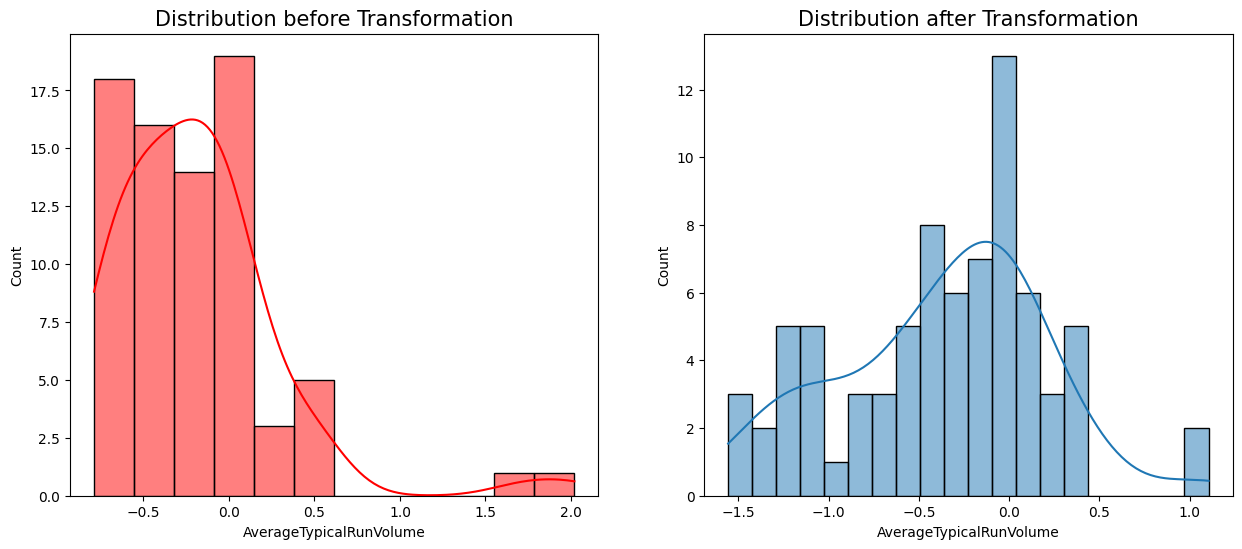

Pre-transform skewness: 2.095574327004445
Post-transform skewness: -0.13698870044052552


In [441]:
right_skewed_secondary = ['AbstractedVolume', 'AverageTypicalRunVolume']

for feat in right_skewed_secondary:
    log_transform(feat)

Much better now :)

Having so little data in machine learning context impacts the overall quality and precision of our models. It can lead to overfitting our models so that we need to make sure that data quality can make up for the quantity of it. Therefore we should pay more attention to outliers and missing values.